# Introduction to Data Science
## Lab 3: Regression

The previous exercises gave an introduction to Python, Numpy and Pandas. Beginning with this exercise, we shift our focus to statistical learning itself. To this end, we will employ the module scikit-learn which offers many functions we will cover over the remaining semester.

### Part A: Linear regression for the Advertising dataset

If not already done, please download the file [Advertising.csv](https://www.tu-chemnitz.de/mathematik/numa/lehre/ds-2019/Exercises/ps3/Advertising.csv) and move it into the current directory on the Jupyter Hub.

**Task**: Import the *Advertising* dataset using `pandas` `read_csv` function. Ensure, that the first column is treated as the index column.

In [34]:
import pandas as pd
import numpy as np

# YOUR CODE HERE
adv = pd.read_csv('Advertising.csv', index_col=0)
# Print first entries of adv
print(adv.head(3))

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3


In [35]:
assert len(adv.index) == 200
assert adv.TV.mean() == 147.0425
assert adv.shape == (200,4)

For convenience, we extract the values from this `pandas`-DataFrame.
This can be done with the method `values`, which returns a `numpy` array.

**Task**: Extract the data in the following manner:
- `X` contains all predictor variables, i.e., the values from the columns `TV`, `Radio` and `Newspaper`.
- `Y` contains the dependent variable `Sales`

In [4]:
X = adv.values[:,0:3]
Y = adv.values[:,3]

In [5]:
assert X.shape == (200,3)
assert Y.shape == (200,)
assert type(X) == np.ndarray
assert type(Y) == np.ndarray

Note that the variables `X` and `Y` contain only the values itself, and no further information like the column title.

Using the `numpy` function `hsplit`, we can split an array horizontally.
This will become handy in many circumstances.
Here, we split the 2-dimensional numpy array `X` into three 
**2**-dimensional slices `tv`, `radio` and `news`.
Note that the returned arrays have still the second dimension (which is one)!

In [6]:
tv, radio, news = np.hsplit(X,3)

Compute for each of the 3 predictor variables **TV**, **radio** and **newspaper** simple (1-dimensional) linear regressions, e.g.

$$ y^{TV}_i \approx \beta_0^{TV} + \beta_1^{TV} \, x_i^{TV}$$

Use the following function:

    from sklearn.linear_model import LinearRegression
    
Store the intercepts, i.e., the values $\beta_0$ in variables
       
    intercept_tv, intercept_radio and intercept_news
    
and the linear coefficients, i.e., the values $\beta_1$ in variables

    lincoef_tv, lincoef_radio and lincoeff_news

To print your results in a nice fashion, you can use a command similar to

    print('y = %5.4f + %5.4f x TV' % (intercept, lincoef))

In [7]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

reg_tv = LR.fit(tv,Y)
intercept_tv = reg_tv.intercept_
lincoef_tv = reg_tv.coef_
print('y = %5.4f + %5.4f x TV' % (intercept_tv, lincoef_tv))

reg_radio = LinearRegression().fit(radio,Y)
intercept_radio = reg_radio.intercept_
lincoef_radio = reg_radio.coef_
print('y = %5.4f + %5.4f x radio' % (intercept_radio, lincoef_radio))

reg_news = LinearRegression().fit(news,Y)
intercept_news = reg_news.intercept_
lincoef_news = reg_news.coef_
print('y = %5.4f + %5.4f x news' % (intercept_news, lincoef_news))

y = 7.0326 + 0.0475 x TV
y = 9.3116 + 0.2025 x radio
y = 12.3514 + 0.0547 x news


In [8]:
assert np.abs(intercept_tv-7.0326) < 1e-4
assert np.abs(lincoef_tv-0.0475) < 1e-4

You should observe, that the regression coefficients for **TV** and **newspaper** are very similar.
As you already know from the lecture, it is not satisfying from a mathematical point of view to restrict our investigation to the absolute values of the coefficients.


### Part B: Assessing the quality of a linear fit.

In the lecture you learned about different measures for assessing the quality of a linear fit.
In the last exercise, we already implemented a function to compute the mean squared error (MSE).

This time, we want to compare the $R^2$ scores. You can use the method `score()` of a `LinearRegression` to get the $R^2$ values.
Remember that this value is the proportion of variability in $Y$ explained using **TV**, **radio** or **newspaper** as predictor in a 1-dimensional linear regression fit.

**Task**: Compute the $R^2$ scores and store them in variables
    
    R2_tv, R2_radio, R2_news

In [9]:
R2_tv = reg_tv.score(tv,Y)
print("R^2 for TV:        ", R2_tv)

R2_radio = reg_radio.score(radio,Y)
print("R^2 for radio:     ", R2_radio)

R2_news = reg_news.score(news,Y)
print("R^2 for newspaper: ", R2_news)

R^2 for TV:         0.611875050850071
R^2 for radio:      0.33203245544529525
R^2 for newspaper:  0.05212044544430516


In [10]:
assert np.abs(R2_tv - 0.611875050850071) < 1e-9

### Part C: Predicting values

Now we want to compute the predicted value of sales if we restrict our prediction to one input, i.e. **TV**, **radio** or **newspaper**, resp.
Predict the values $\hat{y}^{TV}$ $\hat{y}^{radio}$ and $\hat{y}^{newspaper}$ using the `LinearRegression`-method `predict()` and store them in variables

    y_tv, y_radio, y_news

In [11]:
y_tv = reg_tv.predict(tv)

y_radio = reg_radio.predict(radio)

y_news = reg_news.predict(news)

In [12]:
assert np.abs(y_tv.mean() -14.0225) < 1e-5
assert np.abs(y_tv.std() - 4.071006120646744) < 1e-5

### Part D: Plotting
Plot the datapoints as well as the corresponding regression line for each of the inputs  **TV**, **radio** or **newspaper**.

You can use the functions `subplots` or `fig.add_subplot` to arrange the plots in one figure.

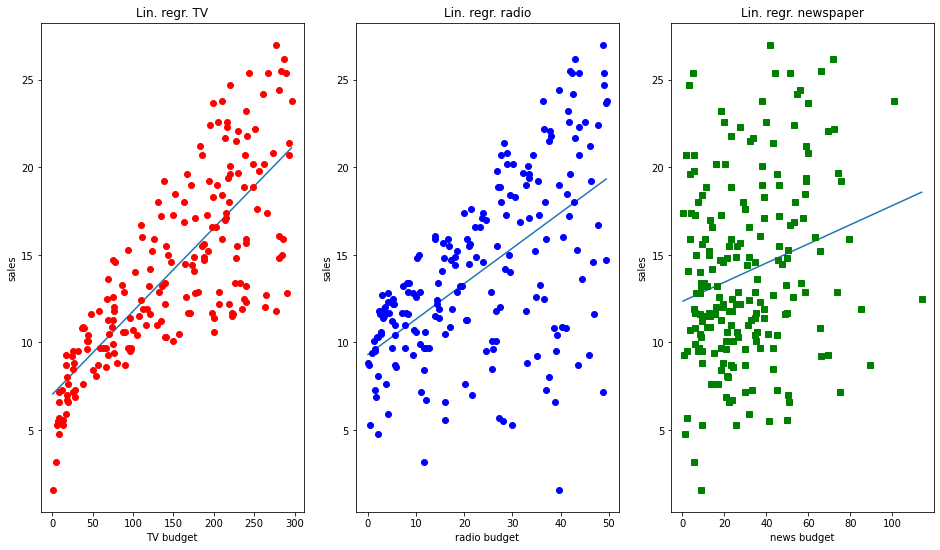

In [13]:
# We plot our findings using subplots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)

fig = plt.figure()
#########  TV  ########
fig.add_subplot(1,3,1)
tv_range = np.arange(tv.min(), tv.max(), 0.1)
plt.plot(tv_range, intercept_tv+tv_range*lincoef_tv)
plt.plot(tv,Y, 'or')
plt.xlabel('TV budget')
plt.ylabel('sales')
plt.title('Lin. regr. TV')

######### radio #########
fig.add_subplot(1,3,2)
radio_range = np.arange(radio.min(), radio.max(), 0.1)
plt.plot(radio_range, intercept_radio + radio_range*lincoef_radio)
plt.plot(radio,Y, 'ob')
plt.xlabel('radio budget')
plt.ylabel('sales')
plt.title('Lin. regr. radio')

######### radio #########

fig.add_subplot(1,3,3)
news_range = np.arange(news.min(), news.max(), 0.1)
plt.plot(news_range, intercept_news + news_range*lincoef_news)
plt.plot(news,Y, 'sg')
plt.xlabel('news budget')
plt.ylabel('sales')
plt.title('Lin. regr. newspaper');


### Part E: Statistical functions

Take a closer look at the correlation matrix for the `DataFrame` `adv`.
You can use the method `corr()` that is implemented for pandas 
`DataFrames`.
Which features are correlated most strongly?

In [15]:
adv.corr()


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [33]:
corr = adv.corr()
corr.style.background_gradient(cmap='coolwarm')

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Name the two features, that are correlated most strongly in the next cell!

`TV` and `sales` are the two features correlated most strongly. Or if one **does not interpret sales** as feature, then `newspaper` and `radio`.

Investigate the statistical significance of the medium **newspaper** in a linear regression involving only this feature. Use a **t-test** for this purpose as described on slide 16 in the document 03_IntroDS_Regression.pdf of the lecture notes.

You should observe the following values:

|Coefficient | Estimate | SE | t-statistic | p-value|
|:-----------|----------|----|-------------|--------|
| $\beta_0$  | 12.351   | 0.621 | 19.88 | < 0.0001 |
| $\beta_{newspaper}$   | 0.055 | 0.017 | 3.30 | 0.00115


You should use `scipy` to get the $t$-distribution using

    from scipy.stats import t
    
The cumulative distribution function at a point `x` for `n` degrees of freedom can than be called by

    t.cdf(x, n)

In [16]:
from scipy.stats import t

def SimpleLinearRegression (x, y, print_results=False):
    n=len(x)
    if(x.shape!=y.shape):
        print('Error: The shapes of x and y are not same', x.shape, y.shape)
        return 
    
    x_mean=x.mean()
    y_mean=y.mean()

    SXX=((x-x_mean)**2).sum()
    SXY=((x-x_mean)*(y-y_mean)).sum()

    beta_1 = SXY/SXX
    beta_0=y_mean-beta_1*x_mean

    RSS=((y-beta_0-beta_1*x)**2).sum()
    RSE= np.sqrt(RSS/(n-2))

    SE0=np.sqrt(RSE**2*(1/n+x_mean**2/SXX))
    SE1=np.sqrt(RSS/(n-2)/SXX)

    tstat_0 = beta_0/SE0
    tstat_1 = beta_1/SE1

    pval_0 = (1-t.cdf(tstat_0, n-1))*2
    pval_1 = (1-t.cdf(tstat_1, n-1))*2
    
    results={'beta_0':beta_0,'beta_1':beta_1, 
            'SE0':SE0, 'SE1':SE1, 
            'tstat_0':tstat_0, 'tstat_1':tstat_1, 
            'pval_0':pval_0, 'pval_1':pval_1}
    if (print_results):
        print("Intercept: %7.4f" % beta_0)
        print("Lin. coef: %7.4f" % beta_1)
        print("")
        print("std-error Intercept: %7.4f" %  SE0)
        print("std-error Lin. coef: %7.4f" % SE1)
        print("")
        print("t-statistic Intercept: %6.2f" % tstat_0)
        print("t-statistic Lin. coef: %6.2f" % tstat_1)
        print("")
        print("P-value Intercept: %7.5f" % pval_0)
        print("P-value Lin. coef: %7.5f" % pval_1)
    return results


y=Y.reshape(-1,1)
results = SimpleLinearRegression(news,y, print_results=True)

Intercept: 12.3514
Lin. coef:  0.0547

std-error Intercept:  0.6214
std-error Lin. coef:  0.0166

t-statistic Intercept:  19.88
t-statistic Lin. coef:   3.30

P-value Intercept: 0.00000
P-value Lin. coef: 0.00115


### Part F: Linear regression on all prectictors

Now construct a linear regression on all three predictor variables, i.e.

$$y_i ≈ \beta_0 + \beta_{TV} x^{TV}_i + \beta_{radio} x^{radio}_i + \beta_{newspaper} x^{newspaper}_i$$

Ensure that the intercept and linear regression coefficients are stored in the variables

    beta_0, beta_tv, beta_radio and beta_news

In [17]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

reg = LR.fit(X,Y)
beta_tv, beta_radio, beta_news = reg.coef_
beta_0 = reg.intercept_

print('y = %5.4f + %5.4f x TV + %5.4f x radio + %5.4f x newspaper' % (beta_0, beta_tv, beta_radio, beta_news))

y = 2.9389 + 0.0458 x TV + 0.1885 x radio + -0.0010 x newspaper


In [18]:
assert np.abs(beta_0 - 2.9389) < 1e-4

What portion of the variance (between 0 and 1) is explained by this linear regression fit? Store your answer in the variable `explained_var`.

In [19]:
explained_var = reg.score(X,Y)

In [20]:
print('The portion of the variance that can be explained by the full model is about %8.6f' % explained_var)


The portion of the variance that can be explained by the full model is about 0.897211


Now perform a linear regression that incorporates only the predictors **TV** and **radio**.
Compute the $R^2$-value of this linear regression model and compare it to the $R^2$-value of the full multiple linear regression.

In [21]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

tv_radio=adv[['TV','radio']]
reg_tv_radio = LR.fit(tv_radio,Y)
R2_tv_radio = reg_tv_radio.score(tv_radio,Y)

In [22]:
print('The R^2 score for the model using TV and Radio as predictors is %8.6f' % R2_tv_radio)


The R^2 score for the model using TV and Radio as predictors is 0.897194


You should observe that the $R^2$-score for the linear regression fit incorporating all three features is only marginally larger than the score using only **TV** and **radio** for the prediction.
Thus, it might be sufficient to exclude the **feature** newspaper from our prediction.

The procedure we did today is called *feature selection* is should be one of the first steps in every statistical learning problem.

### Part G: Computing the t-statistic for the full model

We have already seen, that the **t-test** comes in handy when one has to decide whether a coefficient for a single feature is significant or not.
As has been outlined in the lecture, one can also use the t-test in a multiple linear regression fit

$$ Y = X \beta + \varepsilon $$

while the intercept is incorporated into $X$, i.e. a column containing only ones is stacked in front of the original matrix $X$.

The formula to compute the test statistic in this generalized setting is

$$ t_j = \frac{\hat{\beta}_j}{\hat{\sigma} \sqrt{v_j}} $$

while $\hat \beta_j$ is the $j$-th entry of the coefficient vector

$$ \hat \beta = (X^\top X)^{-1} X^\top y, $$

$\hat{\sigma}$ is the unbiased estimate of $\sigma$, which is determined by

$$ \hat{\sigma} = \sqrt{\frac{1}{n-p-1} \, \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

and $v_j$ is the $j$-th diagonal element of the matrix $(X^\top X)^{-1}$.

Then $t_j$ is distributed according to a $t$-distribution with $n-p-1$ degrees of freedom (dofs). 

**Task**: Compute the values in the following statistic and try to print it in a similar way. 

|  Coefficient     | Estimate  | SE    | t-statistic | p-value |
|:-----------------|-----------|-------|-------------|---------|
| $\beta_0$        | 2.939     |0.3119 | 9.42        | < 0.0001|
| $\beta_{TV}$     | 0.046     |0.0014 | 32.81       | < 0.0001|
| $\beta_{radio}$  | 0.189     |0.0086 | 21.89       | < 0.0001|
| $\beta_{news}$   | −0.001    |0.0059 | −0.18       | 0.8599  |




In [23]:
import scipy.linalg as LA


def MultipleLinearRegression(X,Y, print_results=False):
    
    n, p = X.shape
    if(n!=len(y)):
        print('Error: The shapes of x and y are not mach', n, len(y))
        return
    df=n-p-1
    X1=np.insert(X, 0, 1, axis=1)
    
    M=LA.inv(X1.T@X1)
    v=M.diagonal()
    beta=M@X1.T@Y
    Y_=X1@beta
    
    #tstat abd pvalue
    SYY = ((Y-Y_)**2).sum()
    sigma=np.sqrt(SYY/df)
    
    SE = sigma*np.sqrt(v)
    tstat = beta/SE
    pval = 2*(1-t.cdf(abs(tstat), df))
    
    if (print_results):
        for i in range(p+1):
            print(f"beta_{i}: {beta[i]:7.4f}")
            print(f"std-error_{i}: {SE[i]:7.4f}")           
            print(f"t-statistic_{i}: {tstat[i]:6.2f}")
            print(f"P-value_{i}: {pval[i]:7.5f}\n")
    
    results={'beta': beta, 'tstat': tstat, 'pval':pval}
    return results

results=MultipleLinearRegression(X,Y,True)

beta_0:  2.9389
std-error_0:  0.3119
t-statistic_0:   9.42
P-value_0: 0.00000

beta_1:  0.0458
std-error_1:  0.0014
t-statistic_1:  32.81
P-value_1: 0.00000

beta_2:  0.1885
std-error_2:  0.0086
t-statistic_2:  21.89
P-value_2: 0.00000

beta_3: -0.0010
std-error_3:  0.0059
t-statistic_3:  -0.18
P-value_3: 0.85992

